# **VALIDACIÓN DE LOS DATOS**

La validación de datos es un paso crucial en cualquier proyecto de data science. No es otra cosa que verificar la calidad y veradicidad de los datos trabajados en los ETL para evitar futuros errores

EMPEZAREMOS A TRABAJAR CON LOS ARCHIVO QUE RESULTARON DE LOS ETL.

In [1]:
#Se conecta Google Colaboratory con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Instala pyspark en Google Colaboratory
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=220cefb9b60e214973aae3683b3220f781aacbd23fcea58f4a50134566d247e5
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
import re
import os # Proporciona funciones para interactuar con el sistema operativo.
import requests # Se utiliza para realizar solicitudes HTTP.
import pandas as pd # Una librería de análisis de datos.
import seaborn as sns #S e utiliza para la visualización de datos.
import pyspark.pandas as ps # Proporciona una interfaz para trabajar con datos en Spark utilizando el formato de DataFrame de pandas.
import json # Se utiliza para trabajar con datos en formato JSON.
from pyspark.sql import SparkSession # Se utiliza para crear una instancia de SparkSession, que es la entrada principal para trabajar con Spark SQL.
from pyspark.sql import functions as F #  Proporciona funciones para trabajar con datos en Spark DataFrame.
from pyspark.sql.functions import array_contains # Esta función se utiliza para filtrar los datos basados en la presencia de un valor en un array.
from pyspark.sql.functions import sum, col # Se utiliza para acceder a una columna en un DataFrame de Spark.
from pyspark.sql.functions import split, substring, concat_ws
from pyspark.sql.functions import expr
from pyspark.sql.types import StringType

/usr/local/lib/python3.10/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder\
        .master("local")\
        .appName("validacioness")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
spark

# **GOOGLE**

### **DataSet: METADATA - SITIOS**

In [6]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/transformaciones/meta-final.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo
df_meta = df_list[0]
for dataframe in df_list[1:]:
    df_meta = df_meta.unionByName(dataframe)

# Mostrar el DataFrame final
df_meta.show()

+--------------------+----------+--------------------+--------------------+----------+------------+--------------------+--------------+--------------------+-----+--------------+
|             address|avg_rating|            category|             gmap_id|  latitude|   longitude|                name|num_of_reviews|                 url|state|          city|
+--------------------+----------+--------------------+--------------------+----------+------------+--------------------+--------------+--------------------+-----+--------------+
|City Textile, 300...|       4.5|    Textile exporter|0x80c2c98c0e3c16f...|34.0188913|-118.2152898|        City Textile|             6|https://www.googl...|   CA|   Los Angeles|
|San Soo Dang, 761...|       4.4|   Korean restaurant|0x80c2c778e3b73d3...|34.0580917|-118.2921295|        San Soo Dang|            18|https://www.googl...|   CA|   Los Angeles|
|Nova Fabrics, 220...|       3.3|        Fabric store|0x80c2c89923b27a4...|34.0236689|-118.2329297|        Nov

### **DataSet: REVIEWS - ESTADOS**

In [7]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/Datos-Limpios/estados-limpiosw3.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo
df_es = df_list[0]
for dataframe in df_list[1:]:
    df_es = df_es.unionByName(dataframe)

# Mostrar el DataFrame final
df_es.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab-Notebooks/Datos-Limpios/estados-limpiosw3.csv'

# **YELP**

### **DataSet: CHECKIN**

In [ ]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab-Notebooks/Datos-Limpios/user-limpio2.csv'

df_us = pd.read_csv(ruta_archivo)
df_us.head()

,user_id;name;review_count;useful;funny;cool;friends;fans;average_stars;compliment_hot;compliment_more;compliment_profile;compliment_cute;compliment_list;compliment_note;compliment_plain;compliment_cool;compliment_funny;compliment_writer;compliment_photos
0,fFGPBtsutYpn3A155Sf75Q;Brandon;194;250;103;121...
1,nkN_do3fJ9xekchVC-v68A;Jeremy;1366;18524;10049...
2,wqoXYLWmpkEH0YvTmHBsJQ;Michael;398;1393;734;66...
3,co_jK_x-CvK2Z3ZrJLz1SQ;j;12;21;3;4;7;0;2.5;0;0...
4,23J4vG9_xxxdnmi8CBX7Ng;Joan;1674;21509;15514;1...


In [ ]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
carpeta = '/content/drive/MyDrive/Colab-Notebooks/Imagenes/reviews-gabi.csv'

# Listar archivos en la carpeta
archivos = os.listdir(carpeta)

# Crear una lista para almacenar los DataFrames
df_list = []

# Iterar sobre los archivos y cargar cada archivo CSV en un DataFrame
for archivo_name in archivos:
    if archivo_name.endswith('.csv'):
        archivo_path = os.path.join(carpeta, archivo_name)
        df = spark.read.csv(archivo_path, header=True)
        # Convertir la columna "MISC" a tipo String si es necesario
        if 'MISC' in df.columns:
            df = df.withColumn("MISC", col("MISC").cast("string"))
        df_list.append(df)

# Unir los DataFrames en uno solo si la lista no está vacía
if df_list:
    df_rv = df_list[0]
    for dataframe in df_list[1:]:
        df_rv = df_rv.unionByName(dataframe)

    # Mostrar el DataFrame final
    df_rv.show()
else:
    print("No se encontraron archivos CSV en la carpeta.")


+--------------------+--------------------+--------------------+--------------------+------+----+------+-----+
|           review_id|             user_id|         business_id|              review|rating|cool|useful|funny|
+--------------------+--------------------+--------------------+--------------------+------+----+------+-----+
|v9T854Buie50ampQv...|tUZZmRLita8wiOSzi...|JQz0_R70G3bjQ5dRq...|Tried the Wild Fl...|   5.0|   0|     0|    0|
|0fyPnDZpgIZ3qLbM5...|ViB5JewsCy9n0wWQ2...|qOdsOVOM98hHj1SCR...|Always had great ...|   5.0|   0|     0|    0|
|OUlj0MXx4kNszlOCS...|jKt2oBDTr1H2R29H8...|mMPvgBgqON8pia_4A...|Had a live roach ...|   1.0|   0|     0|    0|
|O4pdr3XX6fV-Y2dIU...|VTsqr6JtbNeuc9MHK...|0qu0fNTOsSmuREYVI...|This place is so ...|  NULL|NULL|  NULL| NULL|
|We stopped by Col...|                NULL|                NULL|                NULL|  NULL|NULL|  NULL| NULL|
|There was a cute ...|                NULL|                NULL|                NULL|  NULL|NULL|  NULL| NULL|
|

## **EMPEZAMOS CON LA LIMPIEZA DE LOS DATOS Q NO SE PUDIERON CARGAR!**

In [ ]:
from pyspark.sql.functions import count, col, when

In [ ]:
df_rv.count()

14449038

In [ ]:
df_rv.count()

4574864

In [ ]:
# Conteo de valores nulos en cada columna
conteo_nulos = df_es.select([count(when(col(c).isNull(), c)).alias(c) for c in df_es.columns])

# Mostrar el conteo de valores nulos
conteo_nulos.show()



+-------+------+----+-------+
|gmap_id|rating|text|user_id|
+-------+------+----+-------+
|      0|     0|   0|      0|
+-------+------+----+-------+



In [ ]:
# Eliminar filas con valores nulos en la columna 'columna'
df_es = df_es.dropna(subset=['user_id'])

In [ ]:
# Conteo de ocurrencias de cada fila
conteo_filas = df_rv.groupBy(df_rv.columns).count()

# Filtrar las filas duplicadas
filas_duplicadas = conteo_filas.filter(col('count') > 1)

# Mostrar las filas duplicadas
filas_duplicadas.show()

+---------+-------+-----------+------+------+----+------+-----+-----+
|review_id|user_id|business_id|review|rating|cool|useful|funny|count|
+---------+-------+-----------+------+------+----+------+-----+-----+
+---------+-------+-----------+------+------+----+------+-----+-----+



In [ ]:
from pyspark.sql.functions import col

# Intentar convertir la columna "review" a tipo String
df_rv = df_rv.withColumn("review_str", col("review").cast("string"))

# Verificar si hay errores de conversión
errores_conversion = df_rv.filter(col("review") != col("review_str"))

# Mostrar las filas con errores de conversión, si las hay
if errores_conversion.count() > 0:
    errores_conversion.show()
else:
    print("La columna 'review' es del mismo tipo de dato en todas las filas.")



La columna 'review' es del mismo tipo de dato en todas las filas.


### **ruta descarga**

In [ ]:
# Ruta al archivo CSV
file_path = '/content/drive/MyDrive/Colab-Notebooks/Imagenes/reviews-gabi.csv'

# Guardar el DataFrame en un archivo CSV en la carpeta file_path
df_rv.write.csv(file_path, header=True, mode="overwrite")

## **ruta carga**

In [ ]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab-Notebooks/Imagenes/bussines-gabi.csv'

df_bussi = pd.read_csv(ruta_archivo)
df_bussi.head()

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,36.464747,-86.659187,3.5,8,1,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,39.946690,-75.123327,4.5,6,1,"Juice Bars & Smoothies, Restaurants, Fruits & ..."
3,8c0r7olQSYGcws0bTd3ikw,Zesty Tsunami,6614 Osteen Rd,New Port Richey,CA,28.250218,-82.682441,4.0,5,0,"Hawaiian, Food, Food Trucks, Street Vendors, R..."
4,QWqKTWQ2OiDgo3dzNkpung,Jong Ka Jib,6600 N 5th St,Philadelphia,CA,40.052064,-75.127394,4.5,351,1,"Korean, Restaurants"


In [ ]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab-Notebooks/Imagenes/tp-gabi.csv'

df_tip = pd.read_csv(ruta_archivo)
df_tip.head()

,user_id,business_id,tip
0,rCumu_NyXfbyq16cP8vOEw,cXSyVvOr9YRN9diDkaWs0Q,Simply the best breakfast around!! The staff i...
1,LT_JU6bY75H918eKnnXeVQ,kLYhipAEvdT1ORfluX5gbw,Crunchy French toast is amazing!
2,sxZX1armKzagQxDnbvPnkw,gTC8IQ_i8zXytWSly3Ttvg,"Lunch specials are great, especially their hom..."
3,KI4UutWtai0UKZ6ZK2pg2Q,P3bw4h4kCaMaYqGGNLt3Jg,"Low selection, quiet"
4,C14KW1jjKM8QlYfMyzP1sQ,aUjJ_x1KuvWmqIErhdaHzg,"Pretty good pad thai, but when I asked for lim..."


In [ ]:
# Ruta a la carpeta que contiene los archivos CSV en Google Drive
ruta_archivo = '/content/drive/MyDrive/Colab-Notebooks/Imagenes/checkin-gabi.csv'

df_cki = pd.read_csv(ruta_archivo)
df_cki.head()

,business_id
0,---kPU91CF4Lq2-WlRu9Lw
1,---kPU91CF4Lq2-WlRu9Lw
2,---kPU91CF4Lq2-WlRu9Lw
3,---kPU91CF4Lq2-WlRu9Lw
4,---kPU91CF4Lq2-WlRu9Lw


### **CONTEOS DE FILAS**

In [ ]:
#Conteo de filas de METADATA-SITIOS
df_meta.count()

2329

In [ ]:
#Conteo de filas de ESTADOS
df_es.count()

4462681

In [ ]:
#Conteo de filas de BUSSINES
df_bussi.count()

business_id     1812
name            1812
address         1799
city            1812
state           1812
latitude        1812
longitude       1812
stars           1812
review_count    1812
is_open         1812
categories      1812
dtype: int64

In [ ]:
#Conteo de filas de CHECKIN
df_cki.count()

business_id    13356875
dtype: int64

In [ ]:
#Conteo de filas de TIP
df_tip.count()

user_id        908843
business_id    908843
tip            908843
dtype: int64

In [ ]:
#Conteo de filas de REVIEWS
df_rv.count()

4574864

In [ ]:
#Conteo de filas de USER
df_us.count()

user_id;name;review_count;useful;funny;cool;friends;fans;average_stars;compliment_hot;compliment_more;compliment_profile;compliment_cute;compliment_list;compliment_note;compliment_plain;compliment_cool;compliment_funny;compliment_writer;compliment_photos    1987889
dtype: int64

### **DATOS NULOS**

In [ ]:
# Conteo de valores nulos en cada columna - METADATA
conteo_nulos_mt = df_meta.agg(*[
    sum(col(c).isNull().cast("int")).alias(c) for c in df_meta.columns
])

# Mostrar el conteo de valores nulos
conteo_nulos_mt.show()

+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
|address|avg_rating|category|gmap_id|latitude|longitude|name|num_of_reviews|url|state|city|
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
|      0|         0|       0|      0|       0|        0|   0|             0|  0|    0|   0|
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+



In [ ]:
# Conteo de valores nulos en cada columna - ESTADOS
conteo_nulos_es = df_es.agg(*[
    sum(col(c).isNull().cast("int")).alias(c) for c in df_es.columns
])

# Mostrar el conteo de valores nulos
conteo_nulos_es.show()

+-------+------+----+-------+
|gmap_id|rating|text|user_id|
+-------+------+----+-------+
|      0|     0|   0|      0|
+-------+------+----+-------+



In [ ]:
# Conteo de valores nulos en cada bussines yelp
conteo_nulos = df_bussi.isnull().sum()

# Mostrar el conteo de valores nulos
print(conteo_nulos)

business_id      0
name             0
address         13
city             0
state            0
latitude         0
longitude        0
stars            0
review_count     0
is_open          0
categories       0
dtype: int64


In [ ]:
# Conteo de valores nulos en cada checkin yelp
conteo_nulos = df_cki.isnull().sum()

# Mostrar el conteo de valores nulos
print(conteo_nulos)

business_id    0
dtype: int64


In [ ]:
# Conteo de valores nulos en cada tip yelp
conteo_nulos = df_tip.isnull().sum()

# Mostrar el conteo de valores nulos
print(conteo_nulos)

user_id        0
business_id    0
tip            0
dtype: int64


In [ ]:
# Conteo de valores nulos en cada user yelp
conteo_nulos = df_us.isnull().sum()

# Mostrar el conteo de valores nulos
print(conteo_nulos)

user_id;name;review_count;useful;funny;cool;friends;fans;average_stars;compliment_hot;compliment_more;compliment_profile;compliment_cute;compliment_list;compliment_note;compliment_plain;compliment_cool;compliment_funny;compliment_writer;compliment_photos    0
dtype: int64


In [ ]:
# Conteo de valores nulos en cada columna - reviews yelp
conteo_nulos_rv = df_rv.agg(*[
    sum(col(c).isNull().cast("int")).alias(c) for c in df_rv.columns
])

# Mostrar el conteo de valores nulos
conteo_nulos_rv.show()

+---------+-------+-----------+------+------+----+------+-----+----------+
|review_id|user_id|business_id|review|rating|cool|useful|funny|review_str|
+---------+-------+-----------+------+------+----+------+-----+----------+
|        0|      0|          0|     0|     0|   0|     0|    0|         0|
+---------+-------+-----------+------+------+----+------+-----+----------+



### **DUPLICADOS**

In [ ]:
# Conteo de ocurrencias de cada fila
conteo_filas = df_meta.groupBy(df_meta.columns).count()

# Filtrar las filas duplicadas
filas_duplicadas = conteo_filas.filter(col('count') > 1)

# Mostrar las filas duplicadas
filas_duplicadas.show()

+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+-----+
|address|avg_rating|category|gmap_id|latitude|longitude|name|num_of_reviews|url|state|city|count|
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+-----+
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+-----+



In [ ]:
# Conteo de ocurrencias de cada fila
conteo_filas = df_es.groupBy(df_es.columns).count()

# Filtrar las filas duplicadas
filas_duplicadas = conteo_filas.filter(col('count') > 1)

# Mostrar las filas duplicadas
filas_duplicadas.show()

+--------------------+------+--------------------+--------------------+-----+
|             gmap_id|rating|                text|             user_id|count|
+--------------------+------+--------------------+--------------------+-----+
|I didn't expect i...|   0.0|the dishes were a...|the staff very ki...|    2|
|I love coming her...|   0.0|and soak in the f...|          are crazy!|    2|
|The best pizza of...|   0.0|and the food is d...|and all employees...|    2|
|       Good services|   0.0|   very professional|      witout ammonia|    2|
|Since I'm a dude ...|   0.0|it may be a good ...|      two thumbs up!|    2|
|   Family atmosphere|   0.0|          good music|  a horrible service|    2|
|I highly recommen...|   0.0|are absolutely be...|do not let that d...|    2|
|Excellent service...|   0.0|            bicycles|cars and everythi...|    2|
|Pennsylvania Aven...|   0.0|it is served by t...|4 and 5 trains al...|    2|
+--------------------+------+--------------------+--------------

In [ ]:
# Conteo de ocurrencias de cada fila
conteo_filas = df_rv.groupBy(df_rv.columns).count()

# Filtrar las filas duplicadas
filas_duplicadas = conteo_filas.filter(col('count') > 1)

# Mostrar las filas duplicadas
filas_duplicadas.show()

+---------+-------+-----------+------+------+----+------+-----+----------+-----+
|review_id|user_id|business_id|review|rating|cool|useful|funny|review_str|count|
+---------+-------+-----------+------+------+----+------+-----+----------+-----+
+---------+-------+-----------+------+------+----+------+-----+----------+-----+



In [ ]:
# Verificación de columnas duplicadas en el DataFrame business_yelp
bussi = df_bussi.columns.duplicated()
bussi

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Verificar si hay filas duplicadas
hay_duplicados = df_bussi.duplicated().any()

# Mostrar el resultado
print(hay_duplicados)


False


In [ ]:
# Verificación de columnas duplicadas en el DataFrame checkin_yelp
cki = df_cki.columns.duplicated()
cki

array([False])

In [ ]:
# Verificar si hay filas duplicadas
hay_duplicados = df_cki.duplicated().any()

# Mostrar el resultado
print(hay_duplicados)


True


In [ ]:
# Verificación de columnas duplicadas en el DataFrame checkin_yelp
tip = df_tip.columns.duplicated()
tip

array([False, False, False])

In [ ]:
# Verificar si hay filas duplicadas
hay_duplicados = df_tip.duplicated().any()

# Mostrar el resultado
print(hay_duplicados)

True


In [ ]:
# Verificar si hay filas duplicadas
hay_duplicados = df_us.duplicated().any()

# Mostrar el resultado
print(hay_duplicados)

False


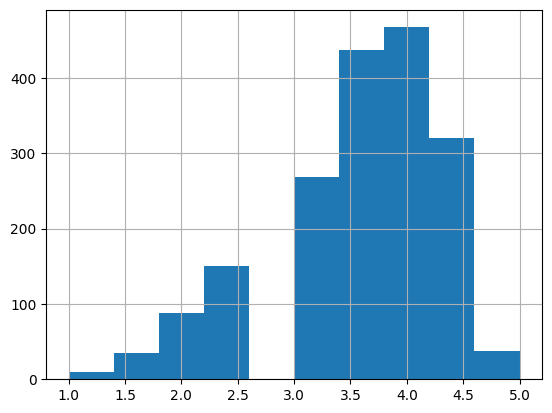

In [ ]:
import matplotlib.pyplot as plt

# Histograma de una columna numérica
df_bussi['stars'].hist()
plt.show()


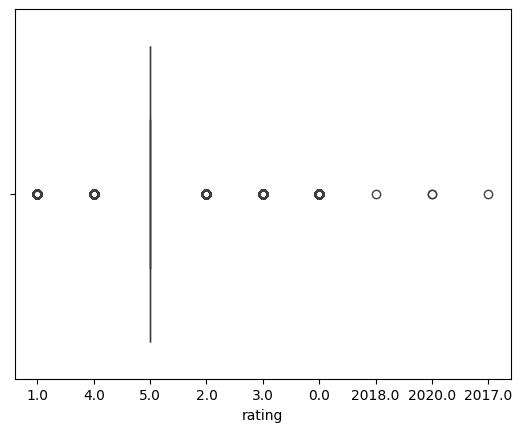

In [ ]:
# Tomar una muestra aleatoria del DataFrame de Spark
df_es_sample = df_es.sample(fraction=0.1, seed=42)

# Convertir el DataFrame de la muestra a Pandas
df_es_pandas = df_es_sample.toPandas()

# Diagrama de caja de una columna numérica
sns.boxplot(x=df_es_pandas['rating'])
plt.show()



In [ ]:
df_bussi.head()

,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,CA,36.464747,-86.659187,3.5,8,1,"Pizza, Chicken Wings, Sandwiches, Restaurants"
2,LhpPSrulqVeTyJeK2xydvQ,Fresh Fruits & Salads,114 N 3rd St,Camden,CA,39.946690,-75.123327,4.5,6,1,"Juice Bars & Smoothies, Restaurants, Fruits & ..."
3,8c0r7olQSYGcws0bTd3ikw,Zesty Tsunami,6614 Osteen Rd,New Port Richey,CA,28.250218,-82.682441,4.0,5,0,"Hawaiian, Food, Food Trucks, Street Vendors, R..."
4,QWqKTWQ2OiDgo3dzNkpung,Jong Ka Jib,6600 N 5th St,Philadelphia,CA,40.052064,-75.127394,4.5,351,1,"Korean, Restaurants"


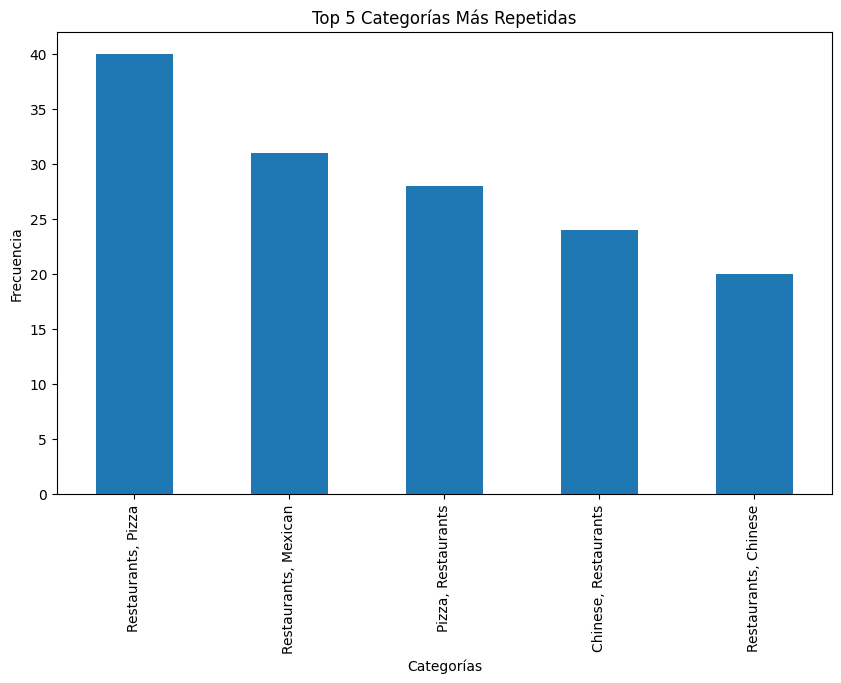

In [ ]:
import matplotlib.pyplot as plt

# Conteo de las categorías y selección de las 5 más repetidas
categoria_counts = df_bussi['categories'].value_counts().nlargest(5)

# Graficar el conteo de las 5 categorías más repetidas
plt.figure(figsize=(10, 6))
categoria_counts.plot(kind='bar')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.title('Top 5 Categorías Más Repetidas')
plt.show()



## **validación de datos para nuestro cliente**

In [ ]:
from pyspark.sql.functions import col

cliente_sgambatis = df_meta.filter(col('category').like('%fast food%'))
cliente_sgambatis.show()


+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
|address|avg_rating|category|gmap_id|latitude|longitude|name|num_of_reviews|url|state|city|
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+



In [ ]:
cliente_sgambatis.show()


+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
|address|avg_rating|category|gmap_id|latitude|longitude|name|num_of_reviews|url|state|city|
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+
+-------+----------+--------+-------+--------+---------+----+--------------+---+-----+----+

